<a href="https://colab.research.google.com/github/jonesLevin/Machine-Learning/blob/main/Feature_Engineering_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Importing the Datasets

In [2]:
data_train = pd.read_csv('/content/train.csv')
data_train.shape

(451748, 12)

In [3]:
data_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [4]:
data_test = pd.read_csv('/content/test.csv')

Merge Train and Test Data

In [5]:
data = data_train.append(data_test)

In [6]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502780 entries, 0 to 51031
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     502780 non-null  int64  
 1   Product_ID                  502779 non-null  object 
 2   Gender                      502778 non-null  object 
 3   Age                         502778 non-null  object 
 4   Occupation                  502778 non-null  float64
 5   City_Category               502778 non-null  object 
 6   Stay_In_Current_City_Years  502778 non-null  object 
 7   Marital_Status              502778 non-null  float64
 8   Product_Category_1          502778 non-null  float64
 9   Product_Category_2          346711 non-null  float64
 10  Product_Category_3          153717 non-null  float64
 11  Purchase                    451747 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 49.9+ MB


In [8]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.027800e+05,502778.000000,502778.000000,502778.000000,346711.000000,153717.000000,451747.000000
mean,1.002967e+06,8.082315,0.409533,5.296200,9.845739,12.660434,9328.887933
std,2.227147e+03,6.521201,0.491748,3.747319,5.088222,4.125169,4978.412379
min,1.003000e+03,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001465e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5865.000000
50%,1.002986e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8061.000000
75%,1.004411e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12069.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [9]:
data.drop(['User_ID'], axis=1, inplace=True)

In [10]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


Handling Categorical Features

In [12]:
pd.get_dummies(data['Gender'], drop_first=1)

,M
0,0
1,0
2,0
3,0
4,1
...,...
51027,1
51028,1
51029,1
51030,1


In [13]:
data['Gender'] = data['Gender'].map({'F': 0, 'M': 1})
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0.0,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,0.0,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,0.0,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,0.0,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,1.0,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [14]:
data['Age'].value_counts()

26-35    200264
36-45    100534
18-25     91800
46-50     41539
51-55     35281
55+       19542
0-17      13818
Name: Age, dtype: int64

In [15]:
data['Age'] = data['Age'].map({'0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+': 7})

In [16]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0.0,1.0,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,0.0,1.0,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,0.0,1.0,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,0.0,1.0,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,1.0,7.0,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [19]:
data_city = pd.get_dummies(data['City_Category'], drop_first=True)

In [20]:
data_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [21]:
data = pd.concat([data, data_city], axis=1)

In [22]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0.0,1.0,10.0,A,2,0.0,3.0,NaN,NaN,8370.0,0,0
1,P00248942,0.0,1.0,10.0,A,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0.0,1.0,10.0,A,2,0.0,12.0,NaN,NaN,1422.0,0,0
3,P00085442,0.0,1.0,10.0,A,2,0.0,12.0,14.0,NaN,1057.0,0,0
4,P00285442,1.0,7.0,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0,0,1


In [23]:
data.drop(['City_Category'], axis=1, inplace=True)

In [24]:
data.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0.0,1.0,10.0,2,0.0,3.0,NaN,NaN,8370.0,0,0
1,P00248942,0.0,1.0,10.0,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0.0,1.0,10.0,2,0.0,12.0,NaN,NaN,1422.0,0,0
3,P00085442,0.0,1.0,10.0,2,0.0,12.0,14.0,NaN,1057.0,0,0
4,P00285442,1.0,7.0,16.0,4+,0.0,8.0,NaN,NaN,7969.0,0,1


Missing Values

In [25]:
data.isnull().sum()

Product_ID                         1
Gender                             2
Age                                2
Occupation                         2
Stay_In_Current_City_Years         2
Marital_Status                     2
Product_Category_1                 2
Product_Category_2            156069
Product_Category_3            349063
Purchase                       51033
B                                  0
C                                  0
dtype: int64

In [26]:
data['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [27]:
data['Product_Category_2'].value_counts()

8.0     58785
14.0    50766
2.0     45366
16.0    39905
15.0    34953
5.0     24244
4.0     23600
6.0     15174
11.0    12952
17.0    12238
13.0     9775
9.0      5252
12.0     5118
10.0     2810
3.0      2638
18.0     2565
7.0       570
Name: Product_Category_2, dtype: int64

In [28]:
data['Product_Category_2'] = data['Product_Category_2'].fillna(data['Product_Category_2'].mode()[0])

In [29]:
data['Product_Category_2'].isnull().sum()

0

In [30]:
data.isnull().sum()

Product_ID                         1
Gender                             2
Age                                2
Occupation                         2
Stay_In_Current_City_Years         2
Marital_Status                     2
Product_Category_1                 2
Product_Category_2                 0
Product_Category_3            349063
Purchase                       51033
B                                  0
C                                  0
dtype: int64

In [31]:
data['Product_Category_3'] = data['Product_Category_3'].fillna(data['Product_Category_3'].mode()[0])

In [32]:
data['Occupation'].value_counts()

4.0     66542
0.0     63463
7.0     54009
1.0     43036
17.0    36572
20.0    30888
12.0    28446
14.0    24967
2.0     24267
16.0    23151
6.0     18547
3.0     16208
10.0    11907
5.0     11074
15.0    10953
11.0    10704
19.0     7746
13.0     7191
18.0     5935
9.0      5771
8.0      1401
Name: Occupation, dtype: int64

In [33]:
data['Occupation'] = data['Occupation'].fillna(data['Occupation'].mode()[0])

In [34]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

In [36]:
data['Age'] = data['Age'].fillna(data['Age'].mode()[0])

In [37]:
data.isnull().sum()

Product_ID                        1
Gender                            0
Age                               0
Occupation                        0
Stay_In_Current_City_Years        2
Marital_Status                    2
Product_Category_1                2
Product_Category_2                0
Product_Category_3                0
Purchase                      51033
B                                 0
C                                 0
dtype: int64

In [38]:
data['Stay_In_Current_City_Years'].value_counts()

1     177059
2      92935
3      87261
4+     77584
0      67939
Name: Stay_In_Current_City_Years, dtype: int64

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502780 entries, 0 to 51031
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  502779 non-null  object 
 1   Gender                      502780 non-null  float64
 2   Age                         502780 non-null  float64
 3   Occupation                  502780 non-null  float64
 4   Stay_In_Current_City_Years  502778 non-null  object 
 5   Marital_Status              502778 non-null  float64
 6   Product_Category_1          502778 non-null  float64
 7   Product_Category_2          502780 non-null  float64
 8   Product_Category_3          502780 non-null  float64
 9   Purchase                    451747 non-null  float64
 10  B                           502780 non-null  uint8  
 11  C                           502780 non-null  uint8  
dtypes: float64(8), object(2), uint8(2)
memory usage: 43.2+ MB


In [40]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].map({'1': 1, '2': 2, '3': 3, '4+': 4, '0': 5})

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502780 entries, 0 to 51031
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  502779 non-null  object 
 1   Gender                      502780 non-null  float64
 2   Age                         502780 non-null  float64
 3   Occupation                  502780 non-null  float64
 4   Stay_In_Current_City_Years  502778 non-null  float64
 5   Marital_Status              502778 non-null  float64
 6   Product_Category_1          502778 non-null  float64
 7   Product_Category_2          502780 non-null  float64
 8   Product_Category_3          502780 non-null  float64
 9   Purchase                    451747 non-null  float64
 10  B                           502780 non-null  uint8  
 11  C                           502780 non-null  uint8  
dtypes: float64(9), object(1), uint8(2)
memory usage: 43.2+ MB


In [42]:
data.isnull().sum()

Product_ID                        1
Gender                            0
Age                               0
Occupation                        0
Stay_In_Current_City_Years        2
Marital_Status                    2
Product_Category_1                2
Product_Category_2                0
Product_Category_3                0
Purchase                      51033
B                                 0
C                                 0
dtype: int64

In [43]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].fillna(data['Stay_In_Current_City_Years'].mode()[0])

In [44]:
data['Marital_Status'].value_counts()

0.0    296874
1.0    205904
Name: Marital_Status, dtype: int64

In [45]:
data['Marital_Status'] = data['Marital_Status'].fillna(data['Marital_Status'].mode()[0])

In [46]:
data['Product_Category_1'] = data['Product_Category_1'].fillna(data['Product_Category_1'].mode()[0])

In [47]:
data.isnull().sum()

Product_ID                        1
Gender                            0
Age                               0
Occupation                        0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2                0
Product_Category_3                0
Purchase                      51033
B                                 0
C                                 0
dtype: int64

In [48]:
data['Purchase'].value_counts()

7193.0     160
7089.0     159
6855.0     159
7962.0     156
7093.0     155
          ... 
9160.0       1
14262.0      1
3418.0       1
23091.0      1
14619.0      1
Name: Purchase, Length: 17634, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


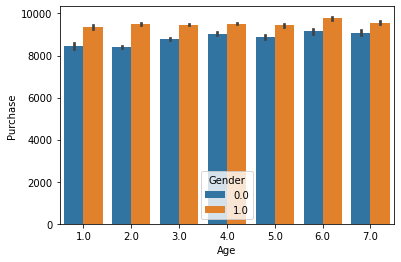

In [50]:
import seaborn as sns
sns.barplot('Age', 'Purchase', hue='Gender', data=data)

Feature Scaling

In [51]:
data_test = data[data['Purchase'].isnull()]

In [52]:
data_train = data[~data['Purchase'].isnull()]

In [66]:
data_test = data_test.drop('Product_ID', axis=1)
data_test.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
451747,1.0,3.0,4.0,1.0,0.0,5.0,8.0,16.0,NaN,0,0
0,1.0,5.0,7.0,2.0,1.0,1.0,11.0,16.0,NaN,1,0
1,1.0,3.0,17.0,5.0,0.0,3.0,5.0,16.0,NaN,0,1
2,0.0,4.0,1.0,4.0,1.0,5.0,14.0,16.0,NaN,1,0
3,0.0,4.0,1.0,4.0,1.0,4.0,9.0,16.0,NaN,1,0


In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [54]:
from sklearn.model_selection import train_test_split

In [69]:
X = data_train.drop('Purchase', axis=1)
y = data_train['Purchase']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)

In [71]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)